In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import load_model 

D:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
D:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '

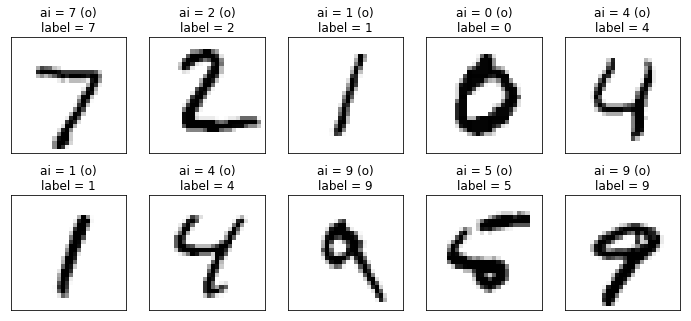

In [2]:
def show_images_labels_predictions(images,labels,predictions,start_id,num=10):
    plt.gcf().set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, i+1)
        ax.imshow(images[start_id], cmap='binary')  #顯示黑白圖片
        
        #處理有傳入預測資料的程式碼
        if( len(predictions) > 0 ) :  #有傳入預測資料
            title = 'ai = ' + str(predictions[start_id])
            # 預測正確顯示(o), 錯誤顯示(x)
            title += (' (o)' if predictions[start_id]==labels[start_id] else ' (x)') 
            title += '\nlabel = ' + str(labels[start_id])
        else :  #沒有傳入預測資料
            title = 'label = ' + str(labels[start_id])
        ax.set_title(title,fontsize=12)  #X,Y軸不顯示刻度
        ax.set_xticks([]);ax.set_yticks([])        
        start_id+=1 
    plt.show()

    #資料預處裡
(train_feature, train_label), (test_feature, test_label) = mnist.load_data()
test_feature_vector = test_feature.reshape(len( test_feature), 784).astype('float32')
test_feature_normalize = test_feature_vector/255

model = load_model('Mnist_mlp_model.h5') 

prediction=model.predict_classes(test_feature_normalize)  #預測
show_images_labels_predictions(test_feature,test_label,prediction,0) #顯示前10筆預測結果